

# Project: No Show Appointment (Project 1)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project focuses on analysing data about whether persons' show up or not after scheduling medical appointments and receiving all the necessary instructions. It specifically centers on finding trends between those who show up and those who dont and what those trends are based on the given data set.

#### Data Dictionary
01  Patient ID           -- Identification of patient  
02  Appointment ID       -- Identification of each appointment  
03  Gender               -- Male or Female  
04  DataMarcacaoConsulta -- The day of the actuall appointment, when they have to visit the doctor  
05  DataAgendamento      -- The day someone called or registered the appointment, this is before appointment of                                 course  
06  Age                  -- How old is the patient  
07  Neighbourhood        -- Where the appointment takes place  
08  Scholarship          -- True or False  
09  Hypertension         -- True or False  
10  Diabetes             -- True or False  
11  Alcoholism           -- True or False  
12  Handicap             -- True or False  
13  SMS_received         -- 1 or more messages sent to the patient  
14  No_show              -- Yes or No  

### Question(s) for Analysis
**1. What factors are necessary to predict if a patient will show up for their scheduled appointments?**  
**2. Does sending SMS messages to patients influence their showing or not showing up for their scheduled appointments?**  
**3. Is age associated with showing up for scheduled appointments?**  
**4. Is gender associated with showing up for scheduled appointments?**   
**5. Is diabetes associated with showing up for scheduled appointments?**  

In [176]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [177]:
# Load data and print out a few lines
df_no_show = pd.read_csv('no_show.csv')
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [178]:
# this returns a tuple of the dimensions of the dataframe...Checks number of columns and rows
df_no_show.shape

(110527, 14)

In [179]:
# A summary of the dataframe, with number of non-null values in each column
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see the data doesnot have Null or missing values in it. We proceed further

In [180]:
# Select unique values from each column
df_no_show.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Data Cleaning

### Drop some columns that wont be useful for this analysis
Some columns like (patientID, Appointment ID) may not be required for the analysis because they are generated system IDs that help in identification and wont point to any detail and therefore will have to be dropped.

### Handcap
I realised it has 5 values other than what is stated in the description of having two values a True or a False or a Yes or No. I will have to drop that too as part of the cleaning.

In [181]:
# Drop columns (PatientId, AppointmentID,Handcap)
df_no_show.drop(['PatientId','AppointmentID','Handcap'], axis=1, inplace=True)

In [182]:
df_no_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No


In [183]:
# useful descriptive statistics for each column of data
df_no_show.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Age cannot be a negative number!
Minimum age is a negative number and Age cannot be a negative number so lets remove that row from the entire data.

In [184]:
# Select the row that has Age is -1
df_no_show[(df_no_show['Age']== -1)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,No


In [185]:
# Drop the entire row with Age -1
df_no_show.drop([99832], axis=0, inplace=True)

In [186]:
# Take a count of Age -1 still in the data
df_no_show[(df_no_show['Age']== -1)].count()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
SMS_received      0
No-show           0
dtype: int64

In [187]:
# Check describe again to make sure "Age= -1" is not added as minimum age
df_no_show.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Remove duplicates from the dataset
Take a count of all duplicates and drop them from the data

In [188]:
# Number of duplicates in dataset
df_no_show.duplicated().sum()

635

In [189]:
# Drop duplicates
df_no_show.drop_duplicates(inplace=True)

In [190]:
# Recheck the number of duplicates to confirm dedupe
df_no_show.duplicated().sum()

0

### Correct labels for misspelling and right python format way for columns label headings
Check for misspelling and organise column heads to the conventional way of labelling columns with small letters and spaces with underscores

In [192]:
# Correct hypertension spelling
df_no_show.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [193]:
# Changing all column labels to small letters and dashes to underscores 
df_no_show.rename(columns=lambda x:x.strip().lower().replace("-", "_"), inplace=True)

In [194]:
df_no_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


In order for me to make a good analysis of the data I need to change the no show column from set of strings into integer values. I will use replace to perform that task 

In [195]:
# Change no_show column from Yes and Nos into 0s and 1s
df_no_show = df_no_show.replace({'no_show': {'Yes': 1, 'No': 0}})
df_no_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0


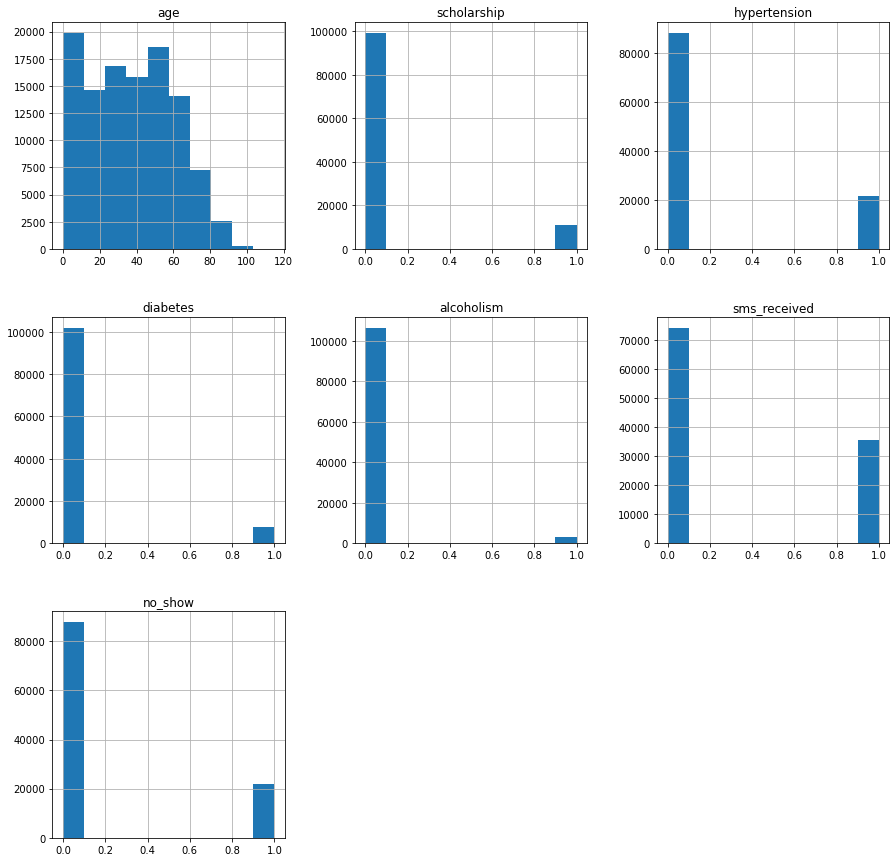

In [196]:
df_no_show.hist(figsize=(15,15));

We can see that histogram showing Age is more skewed to the right. Lets explore it further

### Is age associated with showing up for scheduled appointments?

In [197]:
# Creating masks for those who showed up and didnot show up, thus
df_s  = df_no_show.no_show == 0
df_ns = df_no_show.no_show == 1

In [198]:
df_no_show.age[df_s].mean()

37.796122697709386

In [199]:
df_no_show.age[df_ns].mean()

34.28391709656982

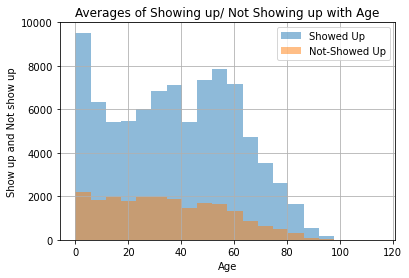

In [219]:
df_no_show.age[df_s].hist(alpha=0.5, bins=20,label='Showed Up');
df_no_show.age[df_ns].hist(alpha=0.5, bins=20, label='Not-Showed Up');
plt.title('Averages of Showing up/ Not Showing up with Age')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Show up and Not show up', fontsize=10)
plt.legend();

Here we can see that those who show up in terms of ages are more than those who do not. Also the average age between those who showed up and those who didnot is not so wide. A further study will give deeper meaning into it.

### Further exploration on Age and No show 
I would like to explore further on Age and No show 

#### Older and younger people which group are likely to attend their medical appointments most ?
We will create a bar chart with one bar for seemingly younger people and another bar for older people.

In [248]:
# Use query to select each group
median = df_no_show['age'].median()
young = df_no_show.query('age < {}'.format(median))
old   = df_no_show.query('age >= {}'.format(median))

In [249]:
# get its mean show up data
mean_quality_young = young['no_show'].mean()
mean_quality_old = old['no_show'].mean()
mean_quality_young,mean_quality_old

(0.22725010598492248, 0.17558143714727345)

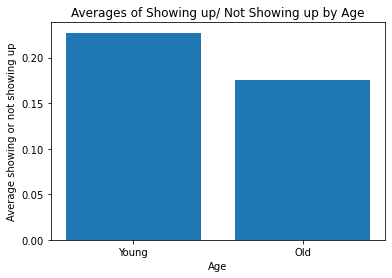

In [250]:
# Create a bar chart with labels
locations = [1, 2]
heights = [mean_quality_young, mean_quality_old]
labels = ['Young', 'Old']
plt.bar(locations, heights, tick_label=labels)
plt.title('Averages of Showing up/ Not Showing up by Age')
plt.xlabel('Age')
plt.ylabel('Average showing or not showing up');

### Analysis of Age and No show
This graph shows that young people showed up more for appointments as compared to older people by some margin.

In [251]:
df_no_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0


### Is gender associated with showing up for scheduled appointments?

In [252]:
# Using python function to reduce code repetition
def bar_plot(arg1, arg2, arg3):
    df_no_show.groupby(arg1).no_show.mean().plot(kind='bar');
    plt.title(arg2)
    plt.xlabel(arg3, fontsize=10)
    plt.ylabel('No show', fontsize=10);

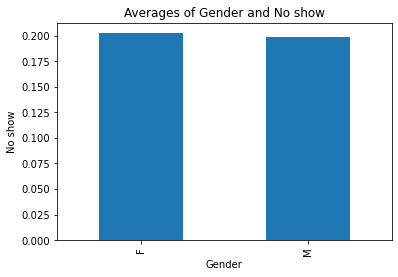

In [253]:
# Calling the function to execute plot for gender and no show
bar_plot('gender', 'Averages of Gender and No show', 'Gender')

In [254]:
df_no_show.groupby(['no_show','gender'], as_index=False).mean()

,no_show,gender,age,scholarship,hypertension,diabetes,alcoholism,sms_received
0,0,F,39.597005,0.117888,0.221678,0.080125,0.016046,0.306912
1,0,M,34.469058,0.049624,0.172580,0.061851,0.057148,0.266476
2,1,F,36.128260,0.144656,0.182013,0.070080,0.020962,0.464891
3,1,M,30.795761,0.060840,0.143530,0.053513,0.047756,0.400890


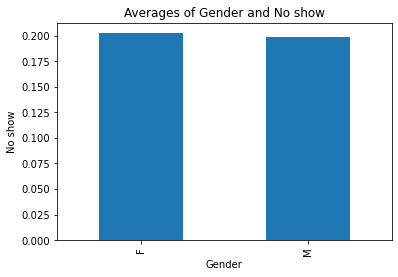

In [255]:
bar_plot(['gender'], 'Averages of Gender and No show', 'Gender')

### Analysis of gender and No show and other variables
Comparing gender with no show column there are slightly more females than males that attended the appointment. 

### Is diabetes associated with showing up for scheduled appointments?

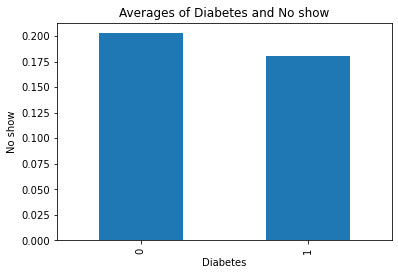

In [256]:
# Calling the function to execute plot for Diabetes and no show
bar_plot('diabetes', 'Averages of Diabetes and No show', 'Diabetes')

In [257]:
def adv_bar_plot(arg1, arg2, arg3):
    plt.title(arg1)
    plt.xlabel(arg2, fontsize=10)
    plt.ylabel(arg3, fontsize=10)
    plt.legend();

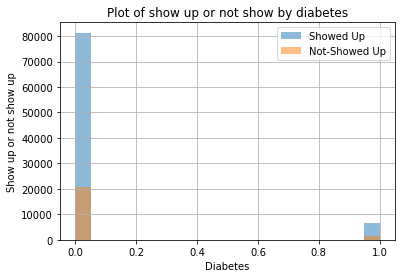

In [258]:
df_no_show.diabetes[df_s].hist(alpha=0.5, bins=20,label='Showed Up');
df_no_show.diabetes[df_ns].hist(alpha=0.5, bins=20, label='Not-Showed Up');

adv_bar_plot('Plot of show up or not show by diabetes', 'Diabetes', 'Show up or not show up')

### Analysis of diabetes and showing up
Also among those who showed up many donot have diabetes compared to those who have same as the data representing those who didnot show up a slight number donot have diabetes whilst a few of them do.
I cannot confidently conclude that diabetes is a factor for showing up for appointments.

### Is alcoholism associated with showing up for scheduled appointments?

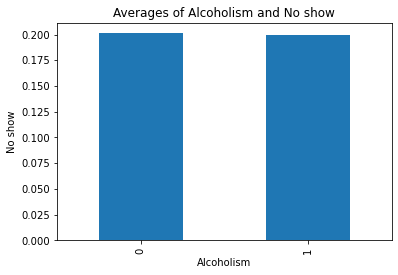

In [259]:
# Calling the function to execute plot for Alcoholism and no show
bar_plot('alcoholism', 'Averages of Alcoholism and No show', 'Alcoholism')

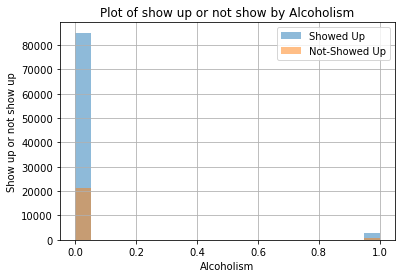

In [260]:
df_no_show.alcoholism[df_s].hist(alpha=0.5, bins=20,label='Showed Up');
df_no_show.alcoholism[df_ns].hist(alpha=0.5, bins=20, label='Not-Showed Up');

adv_bar_plot('Plot of show up or not show by Alcoholism', 'Alcoholism', 'Show up or not show up')

### Analysis of alcoholism and no show
Similarly alcoholism didnot seem to affect the trend too much in that many of the people were not alcoholics and thus wont be a determiner for why they attend appointments.

<a id='conclusions'></a>
## Conclusions

From the analysis it was found that age can be a factor for people showing up or not. Morealso younger patients attend their appointments more than do older people. It is also found that slightly more females show up than males do.
Other factors including diabetes and alcohol do present some but not quiet strong comparison the showing up or not


### Limitations in the project
1. Because most of the data is structured in zeros and ones it was very hard to get a distribution that could be easily interpreted in terms of skewness and correlations. I had challenges working with interpreting the data as should have been. A better description of the parameters would have helped more.  
2. Also there were mistakes in the data looking at the "Handcap" column. In the data description it was mentioned that the data had a Yes or a No but in the data several values were presented so could not be used for the analysis.